In [1]:
# read all the csv files 

In [2]:
import pandas as pd

files = ['5.0.5.SiteSpecific.n.csv', '5.1.5.SiteSpecific.n.csv', '5.2.5.SiteSpecific.n.csv']
files_df = {}

for i in range(len(files)):    
    files_df['df_' + str(i)] = pd.read_csv('./data/' + files[i], delimiter = ' ', header = None, names = ['residue_number', 'accessibility'])
  

In [3]:
files_df['df_0']

,residue_number,accessibility
0,1,1.000
1,2,1.000
2,3,0.040
3,4,0.972
4,5,0.000
...,...,...
3355,3356,0.946
3356,3357,0.390
3357,3358,0.902
3358,3359,0.984


In [4]:
#merge all the df 

In [5]:
ls_df = list(files_df.keys())
merge_df = files_df[ls_df[0]][['residue_number', 'accessibility']].copy()
merge_df['accessibilty' + str(1) ] = files_df[ls_df[1]]['accessibility']
merge_df['accessibilty' + str(2) ] = files_df[ls_df[2]]['accessibility']

In [6]:
merge_df

,residue_number,accessibility,accessibilty1,accessibilty2
0,1,1.000,1.000,1.000
1,2,1.000,1.000,1.000
2,3,0.040,0.010,0.042
3,4,0.972,0.246,0.942
4,5,0.000,0.000,0.000
...,...,...,...,...
3355,3356,0.946,0.944,0.496
3356,3357,0.390,0.270,0.880
3357,3358,0.902,0.670,0.976
3358,3359,0.984,0.996,0.972


In [7]:
#find Avg of residue accessibilty and sd 

In [8]:
merge_df['Avg_accessibility'] = merge_df.loc[:,['accessibility', 'accessibilty1', 'accessibilty2']].mean(axis = 1)

In [9]:
merge_df

,residue_number,accessibility,accessibilty1,accessibilty2,Avg_accessibility
0,1,1.000,1.000,1.000,1.000000
1,2,1.000,1.000,1.000,1.000000
2,3,0.040,0.010,0.042,0.030667
3,4,0.972,0.246,0.942,0.720000
4,5,0.000,0.000,0.000,0.000000
...,...,...,...,...,...
3355,3356,0.946,0.944,0.496,0.795333
3356,3357,0.390,0.270,0.880,0.513333
3357,3358,0.902,0.670,0.976,0.849333
3358,3359,0.984,0.996,0.972,0.984000


In [10]:
#compute sd of avg_accessibility

In [11]:
std  = merge_df['Avg_accessibility'].std()
print(std)

0.37106310601828885


In [12]:
#plot 

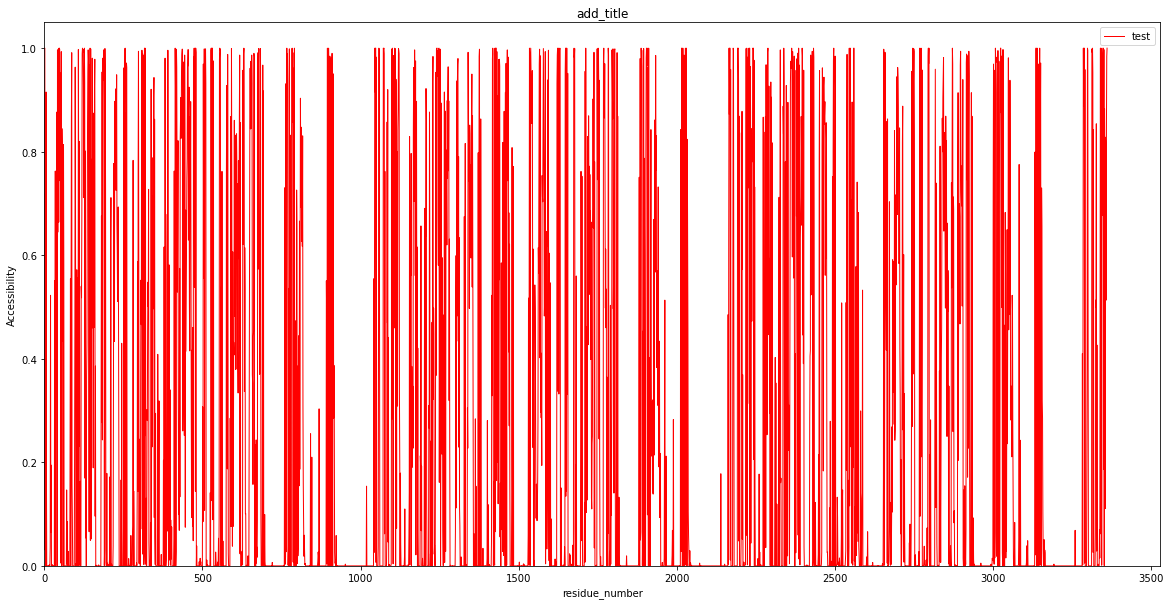

In [13]:
from matplotlib import pyplot as plt
x = merge_df['residue_number']
y = merge_df['Avg_accessibility']

fig, ax = plt.subplots(figsize=(20, 10),)
ax.plot(x, y, color='red', linewidth=1, linestyle='-',label='test') 
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)


ax.set_xlabel('residue_number') # Add an x-label to the axes. 
ax.set_ylabel('Accessibility')  # Add a y-label to the axes.

ax.set_title('add_title')  # Add a title to the axes.
ax.legend(loc='best')

#fig.savefig('output/' + self.out_filename +'.png')
plt.show()

In [14]:
#junk